## Final Version

In [ ]:
glasses_path = "/content/drive/MyDrive/eyeGlassesDetection/glasses-and-coverings/glasses"
no_glasses_path = "/content/drive/MyDrive/eyeGlassesDetection/glasses-and-coverings/plain"

In [ ]:
import os

# Print the list of files in the glasses directory
print("Files in glasses directory:", os.listdir(glasses_path))

# Print the list of files in the no_glasses directory
print("Files in no_glasses directory:", os.listdir(no_glasses_path))


Files in glasses directory: ['140127-f-uu298-004.jpg', '151121-f-ay392-132.jpg', '121219-m-iq377-018.jpg', '1024px-official_portrait_of_mr_simon_clarke_mp_crop_1.jpg', '1577291583facemask-asianman.png', '130220-f-tq704-156.jpg', '0xmjweyvsmbqwe9qpmdnog73ekeqageo.jpeg', '161018-f-id393-003.jpg', '140429-f-et475-007.jpg', '%c3%96sterreichischer_filmpreis_2019_foto_call_markus_schleinzer_1.jpg', '160405-d-sk590-087c.jpg', '1414218402.png', '1280px-woman_in_eyeglasses_-_marcelo_chagas.jpg', '140328-f-dy094-015.jpg', '14311358177_9293c38c42_b.jpg', '080131-f-3961f-001.jpg', '160104-d-pb383-004.jpg', '170099-c-ygz82-043.jpg', '1024px-martin_delius_%28martin_rulsch%29_2.jpg', '090701-f-7906c-026.jpg', '1024px-alban_bagbin.jpg', '051001-f-4266d-002.jpg', '120214-f-ew478-081.jpg', '160830-f-wq716-005.jpg', '131121-f-fc540-002.jpg', '160427-d-dt527-122.jpg', '160331-f-fn535-030.jpg', '160805-f-kq923-001.jpg', '1365px-wikipedia_user_%22charles_kludge%22.jpg', '02_the_african_union_special_represe

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

glasses_path = "/content/drive/MyDrive/eyeGlassesDetection/glasses-and-coverings/glasses"
no_glasses_path = "/content/drive/MyDrive/eyeGlassesDetection/glasses-and-coverings/plain"

# Function to load and preprocess images
def load_images(folder_path, label):
    image_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=(160, 160))  # Adjust target size as needed
            img_array = img_to_array(img)
            image_list.append((img_array, label))
    return image_list

# Load glasses images
glasses_images = load_images(glasses_path, 1)

# Load no glasses images
no_glasses_images = load_images(no_glasses_path, 0)

# Shuffle the combined dataset
combined_dataset = glasses_images + no_glasses_images
random.shuffle(combined_dataset)

# Separate features (X) and labels (y)
X, y = zip(*combined_dataset)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Now you can use X and y to train your model


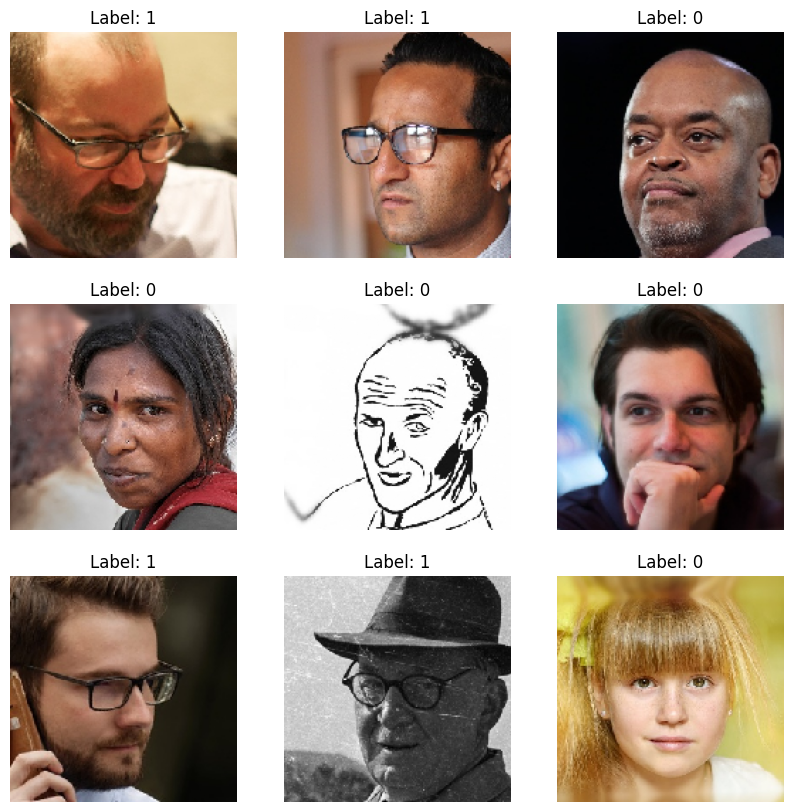

In [ ]:
import matplotlib.pyplot as plt
import random

# Visualize a few random images
plt.figure(figsize=(10, 10))
for i in range(9):
    index = random.randint(0, len(X) - 1)
    image = X[index]
    label = y[index]

    # Normalize pixel values to the range [0, 1]
    image = image / 255.0

    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.show()


In [ ]:
import os

# List files in the glasses_path directory
glasses_files = os.listdir(glasses_path)
print("Files in glasses directory:", len(glasses_files))


Files in glasses directory: 528


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 10s 119ms/step - loss: 0.7114 - ac

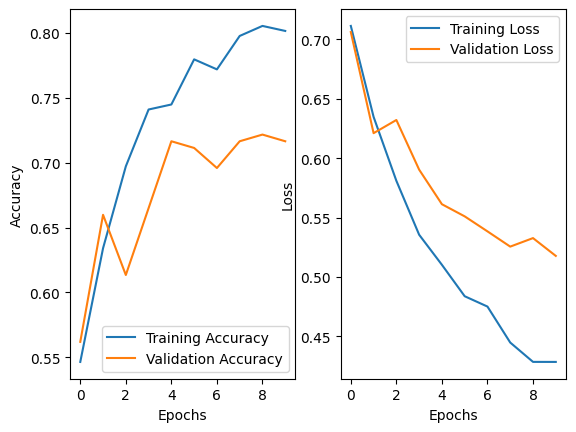

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the pre-trained layers
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # 1 neuron for binary classification (eyeglasses or not)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
# Графік точності
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Графік втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Експерименти для дослідження моделі

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Отримання прогнозів моделі для валідаційного набору
y_val_pred = model.predict(X_val)

# Виведення матриці плутанини та інших метрик
conf_matrix = confusion_matrix(y_val, y_val_pred.round())
classification_report_val = classification_report(y_val, y_val_pred.round())

print("Матриця плутанини:")
print(conf_matrix)

print("\nЗвіт про класифікацію:")
print(classification_report_val)


7/7 [==============================] - 0s 43ms/step
Матриця плутанини:
[[74 27]
 [28 65]]

Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       101
           1       0.71      0.70      0.70        93

    accuracy                           0.72       194
   macro avg       0.72      0.72      0.72       194
weighted avg       0.72      0.72      0.72       194



In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# ... (Your previous code for loading and preprocessing data)

# Load and preprocess the test image
test_image_path = '/content/drive/MyDrive/eyeGlassesDetection/TestIMG/test_img.jpg'  # Replace with the path to your test image
img = cv2.imread(test_image_path)
img = cv2.resize(img, (160, 160))  # Adjust the size to match the input size of the model
img = np.expand_dims(img, axis=0)  # Add an extra dimension for the batch size
img = preprocess_input(img)  # Normalize pixel values

# Make predictions
predictions = model.predict(img)

# Interpret the predictions
class_label = "Glasses" if predictions[0][0] > 0.5 else "No Glasses"
confidence = predictions[0][0] if class_label == "Glasses" else 1 - predictions[0][0]

print(f"The model predicts: {class_label} with confidence: {confidence}")


1/1 [==============================] - 1s 762ms/step
The model predicts: Glasses with confidence: 0.6128104329109192


In [ ]:
# Load and preprocess the second test image
test_image_path2 = '/content/drive/MyDrive/eyeGlassesDetection/TestIMG/test_no_glasses.jpg'  # Replace with the path to your second test image
img2 = cv2.imread(test_image_path2)
img2 = cv2.resize(img2, (160, 160))  # Adjust the size to match the input size of the model
img2 = np.expand_dims(img2, axis=0)  # Add an extra dimension for the batch size
img2 = preprocess_input(img2)  # Normalize pixel values

# Make predictions for the second image
predictions2 = model.predict(img2)

# Interpret the predictions for the second image
class_label2 = "Glasses" if predictions2[0][0] > 0.5 else "No Glasses"
confidence2 = predictions2[0][0] if class_label2 == "Glasses" else 1 - predictions2[0][0]

print(f"The model predicts for the second image: {class_label2} with confidence: {confidence2}")


1/1 [==============================] - 0s 45ms/step
The model predicts for the second image: No Glasses with confidence: 0.9551954343914986


In [ ]:
# Assuming your model is stored in the 'model' variable
model.save('drive/MyDrive/eyeGlassesDetection/glasses_detection_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test model with filters

1/1 [==============================] - 0s 59ms/step
For Brightness Factor 0.2: The model predicts No Glasses with confidence 0.9285691604018211
1/1 [==============================] - 0s 36ms/step
For Brightness Factor 0.5: The model predicts No Glasses with confidence 0.7874780893325806
1/1 [==============================] - 0s 37ms/step
For Brightness Factor 0.8: The model predicts Glasses with confidence 0.501742422580719
1/1 [==============================] - 0s 52ms/step
For Brightness Factor 1.2: The model predicts No Glasses with confidence 0.5021046698093414
1/1 [==============================] - 0s 33ms/step
For Brightness Factor 1.5: The model predicts Glasses with confidence 0.6141195893287659
1/1 [==============================] - 0s 48ms/step
For Brightness Factor 1.8: The model predicts Glasses with confidence 0.8335329294204712


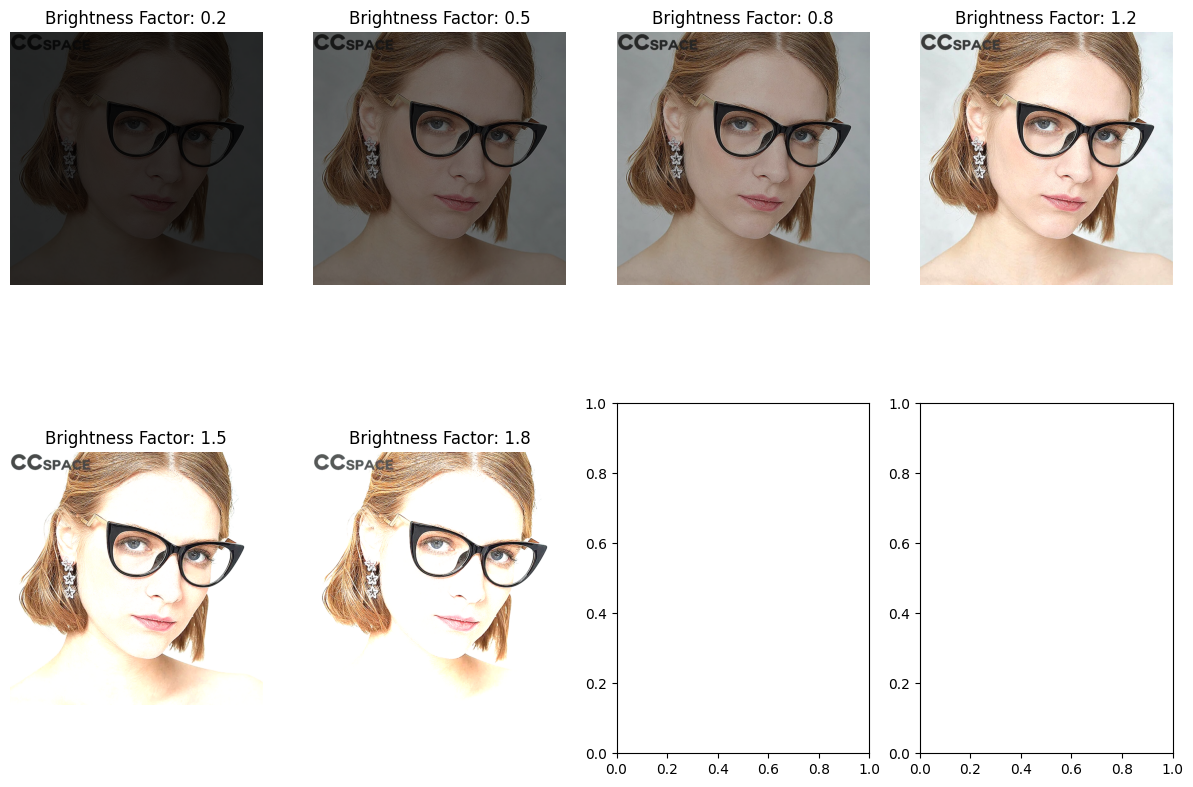

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Шлях до тестового зображення
image_path = '/content/drive/MyDrive/eyeGlassesDetection/TestIMG/test.jpg'

# Завантаження та підготовка тестового зображення
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV зчитує кольори у порядку BGR, тому ми перетворюємо на RGB

# Зміни освітлення та відображення результатів
brightness_factors = [0.2, 0.5, 0.8, 1.2, 1.5, 1.8]  # Фактори для освітлення та затемнення
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Додавання оригінального зображення
axes[0, 0].imshow(img)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Оновлення факторів
for i, factor in enumerate(brightness_factors):
    img_changed = cv2.convertScaleAbs(img, alpha=factor, beta=0)

    # Відображення зміненого зображення
    axes[i // 4, i % 4].imshow(img_changed)
    axes[i // 4, i % 4].set_title(f'Brightness Factor: {factor}')
    axes[i // 4, i % 4].axis('off')

    # Підготовка та відображення зміненого зображення для передбачення моделлю
    img_changed_resized = cv2.resize(img_changed, (160, 160))
    img_changed_resized = np.expand_dims(img_changed_resized, axis=0)
    img_changed_resized = preprocess_input(img_changed_resized)

    # Отримання прогнозів для зміненого зображення
    predictions_changed = model.predict(img_changed_resized)

    # Відображення результатів передбачення
    class_label_changed = "Glasses" if predictions_changed[0][0] > 0.5 else "No Glasses"
    confidence_changed = predictions_changed[0][0] if class_label_changed == "Glasses" else 1 - predictions_changed[0][0]

    print(f"For Brightness Factor {factor}: The model predicts {class_label_changed} with confidence {confidence_changed}")

# Показати графік
plt.show()


In [ ]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import display, HTML, Image
from tensorflow.keras.models import load_model
import time
import matplotlib.pyplot as plt

# Create arrays to store frame processing times and frame numbers
frame_times = []
frame_numbers = []

# Upload a video file
uploaded = files.upload()
video_path = list(uploaded.keys())[0]

# Load the pre-trained face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Load the pre-trained model for glasses detection
model = load_model('drive/MyDrive/eyeGlassesDetection/glasses_detection_model.h5')

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_path = 'output_video.mp4'
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()

    if not ret:
        break
    frame_number = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each face
    for (x, y, w, h) in faces:
        # Extract the region of interest (ROI) corresponding to the face
        face_roi = gray[y:y+h, x:x+w]

        # Resize the face ROI to match the input size of the model
        face_roi = cv2.resize(face_roi, (160, 160))

        # Convert grayscale to RGB (3 channels)
        face_roi_rgb = cv2.cvtColor(face_roi, cv2.COLOR_GRAY2RGB)

        # Normalize the pixel values to the range [0, 1]
        face_roi_rgb = face_roi_rgb / 255.0

        # Expand the dimensions to match the input shape expected by the model
        face_roi_rgb = np.expand_dims(face_roi_rgb, axis=0)

        start_time = time.time()
        # Make predictions using the model
        predictions = model.predict(face_roi_rgb)
        # Calculate the prediction time
        prediction_time = time.time() - start_time

        # Append frame number and processing time to arrays
        frame_numbers.append(frame_number)
        frame_times.append(prediction_time)
        # If the model predicts glasses (assuming 1 is the label for glasses)
        if predictions[0][0] > 0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Green rectangle for glasses
        else:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Blue rectangle for no glasses

    # Convert the frame to RGB (OpenCV uses BGR by default)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame with rectangles around faces
    display(Image(data=cv2.imencode('.jpg', rgb_frame)[1].tobytes()))

    # Save the frame to the output video
    out.write(frame)

# Release the video capture object and video writer
cap.release()
out.release()
cv2.destroyAllWindows()
# Plot the frame processing times
plt.plot(frame_numbers, frame_times, label='Frame Processing Time')
plt.xlabel('Frame Number')
plt.ylabel('Time (seconds)')
plt.title('Frame Processing Time Over Video')
plt.legend()
plt.show()
# Display a link to download the output video
display(HTML(f'<a href="{output_path}" target="_blank">Download Output Video</a>'))


In [ ]:
print(frame_times)
print(frame_numbers)

[0.9055373668670654, 0.0752716064453125, 0.0743563175201416, 0.07265090942382812, 0.07499456405639648, 0.07151293754577637, 0.07553887367248535, 0.06701803207397461, 0.06464815139770508, 0.07313942909240723, 0.07916450500488281, 0.07036018371582031, 0.0650472640991211, 0.08594870567321777, 0.06965899467468262, 0.08126974105834961, 0.06444811820983887, 0.07813739776611328, 0.06718897819519043, 0.3579549789428711, 0.06862068176269531, 0.0846872329711914, 0.1815783977508545, 0.1524953842163086, 0.06551909446716309, 0.08761978149414062, 0.07008504867553711, 0.08381128311157227, 0.06827807426452637, 0.08806324005126953, 0.06714773178100586, 0.10022687911987305, 0.08599352836608887, 0.09029626846313477, 0.539313554763794, 0.17229795455932617, 0.1022796630859375, 0.11460137367248535, 0.14697647094726562, 0.12404894828796387, 0.1150202751159668, 0.12914085388183594, 0.15035200119018555, 0.11353588104248047, 0.11897730827331543, 0.10102343559265137, 0.13123083114624023, 0.10468292236328125, 0.1